In [ ]:
import ast
import inflect
import calendar
import pandas as pd
from glob import glob
from tqdm import tqdm
from skmultilearn.model_selection import iterative_train_test_split

In [75]:
behaviour_attr = [
    "p_camera_reaction",
    "p_tool_use",
    "p_object_carrying",
    "p_bipedal",
    "p_feeding",
    "p_chimp_carrying",
    "p_vocalisation",
    "p_climbing",
    "p_aggression",
    "p_travel",
    "p_sex",
    "p_piloerection",
    "p_social_interaction",
    "p_grooming",
    "p_display",
    "p_cross_species_interaction",
    "p_resting",
    "p_playing",
]

In [98]:
df = pd.read_csv("clips_w_temporally_aligned_behaviours.csv")
dist_df = df[["video_id", "label"]].drop_duplicates()
dist_df.label = df.label.apply(lambda x: ast.literal_eval(x))

In [100]:
# Create new columns for each label
dist_df = pd.DataFrame(dist_df.label.tolist(), columns=behaviour_attr)

In [101]:
dist_df.sum(axis=0)

p_camera_reaction              2549
p_tool_use                     1465
p_object_carrying              1373
p_bipedal                       194
p_feeding                      3769
p_chimp_carrying               1834
p_vocalisation                  993
p_climbing                     2244
p_aggression                    387
p_travel                       5447
p_sex                           214
p_piloerection                   68
p_social_interaction           1896
p_grooming                     1035
p_display                       358
p_cross_species_interaction     198
p_resting                      3751
p_playing                      1534
dtype: int64

<AxesSubplot:>

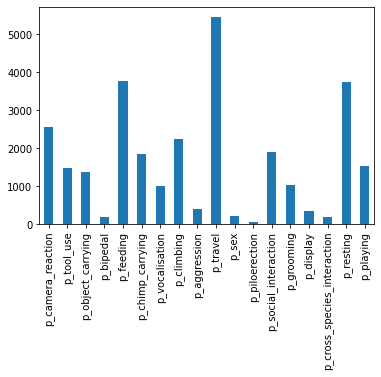

In [102]:
# Get the frequency of each column
dist_df.sum(axis=0).plot.bar()

In [111]:
import torch
import numpy as np
from sklearn.dummy import DummyClassifier
from skmultilearn.model_selection import iterative_train_test_split
from torchmetrics.functional.classification import multilabel_average_precision

# create X with shape (n_samples,)
X = np.arange(labels.shape[0]).reshape((6675, 1))
y = np.array(labels.tolist())

# Iterative train test split
X_train, y_train, X_test, y_test = iterative_train_test_split(X, y, test_size=0.20)

for strat in ["most_frequent", "prior", "stratified", "uniform"]:
    dummy_clf = DummyClassifier(strategy=strat)
    dummy_clf.fit(X_train, y_train)
    predictions = dummy_clf.predict(X_test)

    # Convert preds and labels to tensors
    predictions = torch.tensor(predictions, dtype=torch.float32)
    y_test = torch.tensor(y_test, dtype=torch.float32)

    path_to_labels = "/home/dl18206/Desktop/phd/code/personal/panaf-models/src/supervised/modules/metadata_classifier/labels.txt"
    with open(path_to_labels) as f:
        class_names = f.read().splitlines()

    macro_average_precision = multilabel_average_precision(
        predictions, y_test, num_labels=18, average="macro"
    )
    per_class_average_precision = multilabel_average_precision(
        predictions, y_test, num_labels=18, average=None
    )
    per_class_average_precision = [
        {f"{class_names[idx]}": ap.item()}
        for idx, ap in enumerate(per_class_average_precision)
    ]
    print(f"Strategy: {strat}")
    print(f"mAP: {macro_average_precision.item()}")
    for ap in per_class_average_precision:
        for k, v in ap.items():
            print(f"{k}: {v}")
    print("\n")

Strategy: most_frequent
mAP: 0.24904635548591614
camera_reaction: 0.35573410987854004
tool_use: 0.26953980326652527
object_carrying: 0.24470415711402893
bipedal: 0.029948867857456207
feeding: 0.5690284967422485
chimp_carrying: 0.2731921076774597
vocalisation: 0.15193572640419006
climbing: 0.3754565417766571
aggression: 0.07085464149713516
travel: 0.7954711318016052
sex: 0.027757486328482628
piloerection: 0.010226442478597164
social_interaction: 0.2863403856754303
grooming: 0.1533966362476349
display: 0.051862671971321106
cross_species_interaction: 0.029948867857456207
resting: 0.5602629780769348
playing: 0.2271731197834015


Strategy: prior
mAP: 0.24904635548591614
camera_reaction: 0.35573410987854004
tool_use: 0.26953980326652527
object_carrying: 0.24470415711402893
bipedal: 0.029948867857456207
feeding: 0.5690284967422485
chimp_carrying: 0.2731921076774597
vocalisation: 0.15193572640419006
climbing: 0.3754565417766571
aggression: 0.07085464149713516
travel: 0.7954711318016052
sex: 0.

<ipython-input-111-c610290b7ff1>:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_test = torch.tensor(y_test, dtype=torch.float32)


In [107]:
per_class_average_precision

[{'camera_reaction': 0.3552631437778473},
 {'tool_use': 0.2697368562221527},
 {'object_carrying': 0.24415205419063568},
 {'bipedal': 0.03143274784088135},
 {'feeding': 0.5687134265899658},
 {'chimp_carrying': 0.2726608216762543},
 {'vocalisation': 0.1520467847585678},
 {'climbing': 0.3757309913635254},
 {'aggression': 0.07236842066049576},
 {'travel': 0.7960526347160339},
 {'sex': 0.02777777798473835},
 {'piloerection': 0.010233918204903603},
 {'social_interaction': 0.28654971718788147},
 {'grooming': 0.15570175647735596},
 {'display': 0.05190058425068855},
 {'cross_species_interaction': 0.030701754614710808},
 {'resting': 0.5592105388641357},
 {'playing': 0.22587719559669495}]